In [3]:
import zipfile
import os

# Path to the uploaded ZIP file
zip_path = "/content/drive/MyDrive/Dataset for document classification.zip"

# Destination directory to extract the contents
extract_to = "/content/Dataset2"

# Create the directory if it doesn't exist
os.makedirs(extract_to, exist_ok=True)
# Extracting the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Files extracted to: {extract_to}")

Files extracted to: /content/Dataset2


In [4]:
import os
dataset_path = "/content/Dataset2/Dataset for document classification"
classes = os.listdir(dataset_path)
print(classes)
classes.remove(".DS_Store")
# classes.remove("Tobacco3482-jpg")
print(classes)
print(len(classes))

['Note', 'Letter', 'Form', 'Scientific', 'Report', 'Resume', '.DS_Store', 'News', 'Email', 'Memo', 'ADVE']
['Note', 'Letter', 'Form', 'Scientific', 'Report', 'Resume', 'News', 'Email', 'Memo', 'ADVE']
10


In [5]:
paths = [os.path.join(dataset_path, o) for o in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, o))]

In [6]:
print(paths)

['/content/Dataset2/Dataset for document classification/Note', '/content/Dataset2/Dataset for document classification/Letter', '/content/Dataset2/Dataset for document classification/Form', '/content/Dataset2/Dataset for document classification/Scientific', '/content/Dataset2/Dataset for document classification/Report', '/content/Dataset2/Dataset for document classification/Resume', '/content/Dataset2/Dataset for document classification/News', '/content/Dataset2/Dataset for document classification/Email', '/content/Dataset2/Dataset for document classification/Memo', '/content/Dataset2/Dataset for document classification/ADVE']


In [7]:
print(len(paths))

10


In [8]:
import pandas as pd
nbEntries = [len(os.listdir(path)) for path in paths]

print(classes)
print(nbEntries)

df = pd.DataFrame({'classes': classes, 'entries': nbEntries})
print(df)

['Note', 'Letter', 'Form', 'Scientific', 'Report', 'Resume', 'News', 'Email', 'Memo', 'ADVE']
[202, 568, 432, 262, 266, 121, 189, 600, 621, 231]
      classes  entries
0        Note      202
1      Letter      568
2        Form      432
3  Scientific      262
4      Report      266
5      Resume      121
6        News      189
7       Email      600
8        Memo      621
9        ADVE      231


In [9]:
total_set = []
total_labels = []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".jpg"):
            path = os.path.join(root, file)
            total_set.append(path)
            total_labels.append(root.split(os.path.sep)[-1])

In [10]:
print((total_set))
print(len(total_labels))

['/content/Dataset2/Dataset for document classification/Note/2062055279.jpg', '/content/Dataset2/Dataset for document classification/Note/87705667.jpg', '/content/Dataset2/Dataset for document classification/Note/1000261527.jpg', '/content/Dataset2/Dataset for document classification/Note/91783075.jpg', '/content/Dataset2/Dataset for document classification/Note/89774046a.jpg', '/content/Dataset2/Dataset for document classification/Note/2023192377.jpg', '/content/Dataset2/Dataset for document classification/Note/80405450.jpg', '/content/Dataset2/Dataset for document classification/Note/2029157407.jpg', '/content/Dataset2/Dataset for document classification/Note/0000002770.jpg', '/content/Dataset2/Dataset for document classification/Note/0000007194.jpg', '/content/Dataset2/Dataset for document classification/Note/11282478.jpg', '/content/Dataset2/Dataset for document classification/Note/50488503-8503.jpg', '/content/Dataset2/Dataset for document classification/Note/2056172318.jpg', '/co

In [11]:
def getClass(img):
    return img.split(os.path.sep)[-2]

In [12]:
import random
seed = 42
random.Random(seed).shuffle(total_set)

/content/Dataset2/Dataset for document classification/Report/515321531+-1533.jpg


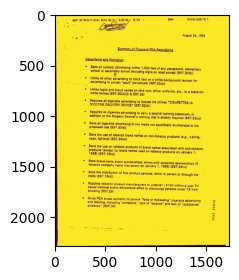

/content/Dataset2/Dataset for document classification/Memo/2021548067.jpg


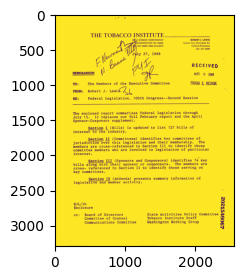

/content/Dataset2/Dataset for document classification/Note/2062055279.jpg


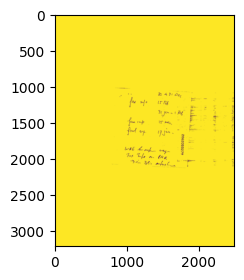

In [13]:
import matplotlib.pyplot as plt
from PIL import Image
for ima in total_set[0:3]:
    print(ima)
    img = Image.open(ima)
    plt.figure(figsize=(3, 3))
    plt.imshow(img)
    plt.show()

In [14]:
train_size = 0.7  # 70%
val_size = 0.15   # 15%
test_size = 0.15  # 15%

total_len = len(total_set)
index = 0

train_set = []
train_label = []

val_set = []
val_label = []

test_set = []
test_label = []

for i in total_set[0: int(total_len * train_size)]:
    train_set.append(i)
    train_label.append(getClass(i))

index = int(total_len * train_size) + 1

for i in total_set[index: int(index + total_len * val_size)]:
    val_set.append(i)
    val_label.append(getClass(i))

index = int(index + total_len * val_size) + 1

for i in total_set[index: total_len]:
    test_set.append(i)
    test_label.append(getClass(i))

In [26]:
print(val_set[7])
print(val_label[7])

/content/Dataset2/Dataset for document classification/Memo/86448705_8716.jpg
Memo


In [23]:
print(train_label)

['Report', 'Memo', 'Note', 'Form', 'Form', 'Report', 'Form', 'Report', 'Form', 'Note', 'Memo', 'Scientific', 'Letter', 'ADVE', 'ADVE', 'Report', 'News', 'Report', 'Scientific', 'Scientific', 'ADVE', 'Letter', 'ADVE', 'Form', 'Scientific', 'Letter', 'Memo', 'News', 'Memo', 'News', 'Report', 'Note', 'Memo', 'ADVE', 'ADVE', 'ADVE', 'Letter', 'Email', 'Memo', 'Memo', 'Note', 'Form', 'Scientific', 'Email', 'Report', 'Memo', 'News', 'Email', 'Letter', 'Resume', 'Memo', 'Email', 'Form', 'Memo', 'Email', 'Memo', 'Form', 'Letter', 'ADVE', 'Memo', 'ADVE', 'Email', 'Note', 'Note', 'ADVE', 'Letter', 'Memo', 'Form', 'Letter', 'Report', 'Memo', 'Letter', 'Memo', 'ADVE', 'Report', 'Email', 'Form', 'Email', 'Letter', 'Memo', 'Email', 'Resume', 'Report', 'Memo', 'ADVE', 'Email', 'Memo', 'Note', 'Form', 'Note', 'Memo', 'Letter', 'Memo', 'Report', 'News', 'Scientific', 'Email', 'Scientific', 'Form', 'Memo', 'Letter', 'Form', 'Form', 'Email', 'Letter', 'News', 'Letter', 'Form', 'Scientific', 'Letter', 'Sc

In [16]:
import cv2
import numpy as np

def process_images_keras(img_set):
    processed_img = []
    for img_path in img_set:
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img.astype(np.float32) / 255.0  # normalize
        processed_img.append(img)
    return np.array(processed_img)  # shape: (N, H, W, C)

data_train = process_images_keras(train_set)
data_val = process_images_keras(val_set)
data_test = process_images_keras(test_set)

In [29]:
# classes is list of all class names (strings)
class_to_idx = {cls: idx for idx, cls in enumerate(classes)}
from tensorflow.keras.utils import to_categorical
# Now y_train matches data_train by index and is ready to use for Keras model training

In [30]:
# For training set
y_train_indices = [class_to_idx[label] for label in train_label]
y_train = to_categorical(y_train_indices, num_classes=len(classes))

# For validation set
y_val_indices = [class_to_idx[label] for label in val_label]
y_val = to_categorical(y_val_indices, num_classes=len(classes))

# For test set
y_test_indices = [class_to_idx[label] for label in test_label]
y_test = to_categorical(y_test_indices, num_classes=len(classes))

In [33]:
print(test_label)

['Form', 'News', 'Note', 'Report', 'Letter', 'ADVE', 'Letter', 'ADVE', 'Form', 'Memo', 'Report', 'Scientific', 'Letter', 'Note', 'Report', 'Letter', 'Letter', 'Form', 'Letter', 'Email', 'Memo', 'Email', 'Scientific', 'Letter', 'Memo', 'Form', 'Memo', 'Form', 'Report', 'Note', 'Report', 'Scientific', 'Note', 'Letter', 'Resume', 'Letter', 'Email', 'Email', 'Report', 'Note', 'Email', 'Letter', 'Memo', 'Memo', 'ADVE', 'Note', 'Email', 'Resume', 'Memo', 'Email', 'Resume', 'ADVE', 'Form', 'Email', 'Letter', 'Scientific', 'Note', 'Note', 'Form', 'Memo', 'Email', 'Letter', 'Letter', 'Form', 'ADVE', 'Email', 'Form', 'Email', 'Memo', 'Form', 'Scientific', 'Memo', 'Form', 'Email', 'Form', 'Form', 'ADVE', 'ADVE', 'Letter', 'Letter', 'ADVE', 'Letter', 'Letter', 'Memo', 'Scientific', 'Email', 'Memo', 'Note', 'Email', 'Memo', 'Email', 'Scientific', 'Memo', 'Email', 'Memo', 'Letter', 'Form', 'Report', 'Form', 'Letter', 'Scientific', 'Letter', 'Memo', 'Email', 'Form', 'Email', 'Letter', 'Letter', 'Emai

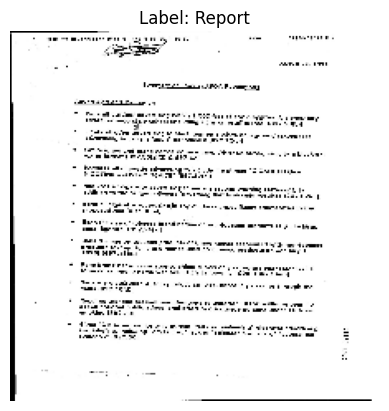

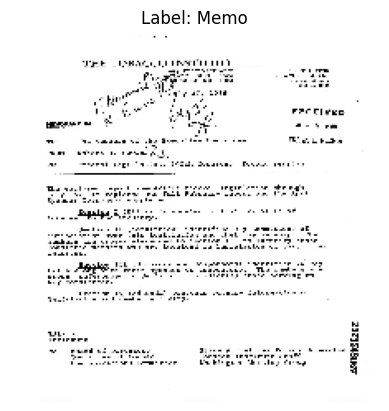

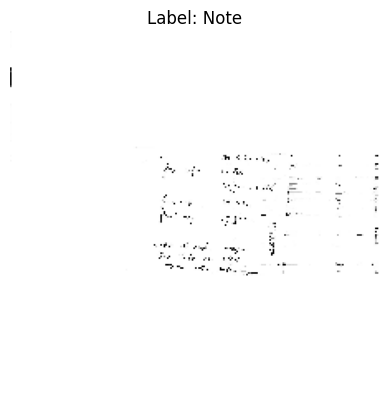

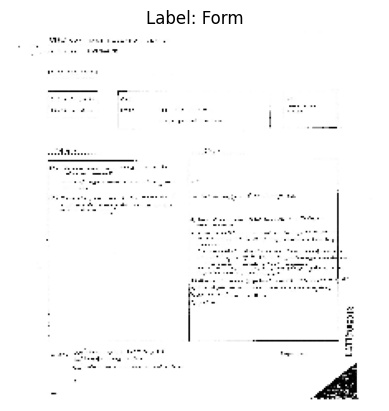

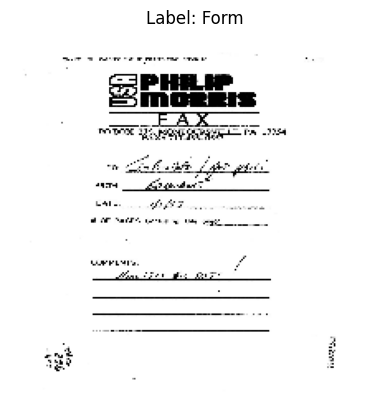

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Helper to decode one-hot label back to class name
def onehot_to_class(onehot_vec, classes):
    idx = np.argmax(onehot_vec)
    return classes[idx]

# Display first 5 images with their labels
for i in range(5):
    plt.imshow(data_train[i])
    plt.title(f"Label: {onehot_to_class(y_train[i], classes)}")
    plt.axis('off')
    plt.show()

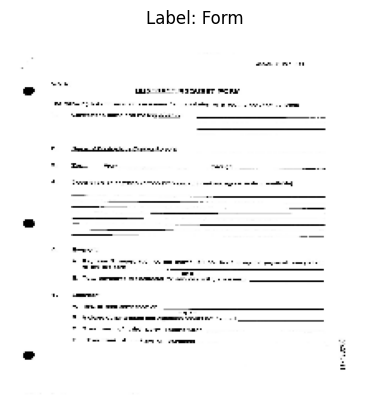

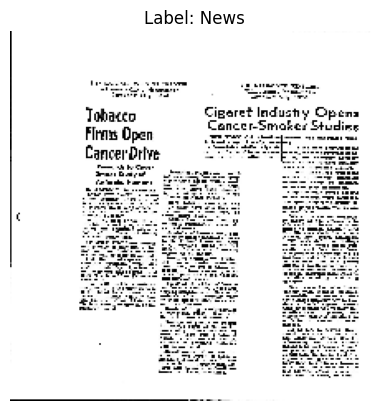

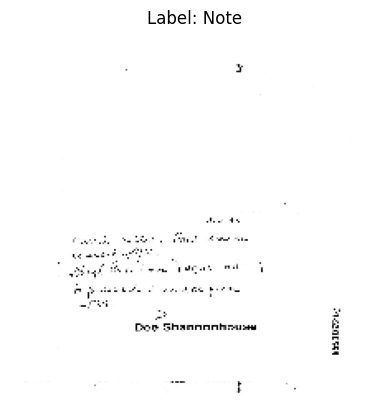

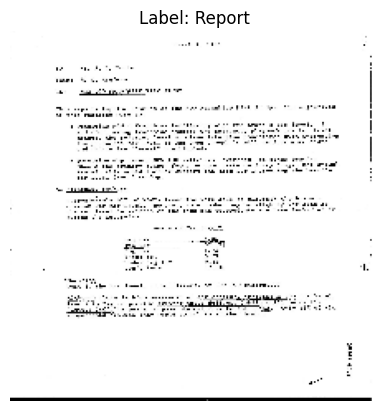

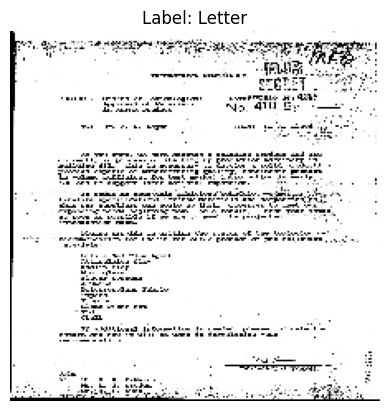

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Helper to decode one-hot label back to class name
def onehot_to_class(onehot_vec, classes):
    idx = np.argmax(onehot_vec)
    return classes[idx]

# Display first 5 images with their labels
for i in range(5):
    plt.imshow(data_test[i])
    plt.title(f"Label: {onehot_to_class(y_test[i], classes)}")
    plt.axis('off')
    plt.show()

In [44]:
print("train images shape : ", data_train.shape)
print("train labels shape : ", y_train.shape)
print(data_train[0])

train images shape :  (2437, 224, 224, 3)
train labels shape :  (2437, 10)
[[[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.34901962 0.34901962 0.34901962]
  [1.         1.         1.        ]
  [0.99607843 0.99607843 0.99607843]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.         0.         0.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.01176471 0.01176471 0.01176471]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]


In [46]:
from tensorflow.keras.applications import VGG16

# Load VGG16 with ImageNet weights, excluding the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Check model summary
base_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))     # You can increase size if needed
model.add(layers.Dropout(0.5))                       # Regularization to avoid overfitting
model.add(layers.Dense(len(classes), activation='softmax'))  # Output layer

In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,927,370 (68.39 MB)

 Trainable params: 17,927,370 (68.39 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
from tensorflow.keras.callbacks import ModelCheckpoint
import os
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

# Mount Google Drive (only needed in Colab)
from google.colab import drive
drive.mount('/content/drive')

# Set path to save weights
checkpoint_path = "/content/drive/MyDrive/document_recognition_model.weights.h5"  # note: changed filename

# Create checkpoint callback
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    mode='min'  # Save when val_loss decreases
)

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with checkpoint
train_model = model.fit(
    data_train, y_train,
    batch_size=64,
    epochs=20,
    verbose=1,
    validation_data=(data_val, y_val),
    callbacks=[checkpoint]  # Use the checkpoint here
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2379 - loss: 2.1990   
Epoch 1: val_loss improved from inf to 1.47351, saving model to /content/drive/MyDrive/document_recognition_model.weights.h5
39/39 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.2406 - loss: 2.1923 - val_accuracy: 0.4866 - val_loss: 1.4735
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 816ms/step - accuracy: 0.5240 - loss: 1.4201
Epoch 2: val_loss improved from 1.47351 to 1.04813, saving model to /content/drive/MyDrive/document_recognition_model.weights.h5
39/39 ━━━━━━━━━━━━━━━━━━━━ 93s 935ms/step - accuracy: 0.5249 - loss: 1.4177 - val_accuracy: 0.6667 - val_loss: 1.0481
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 811ms/step - accuracy: 0.6561 - loss: 1.0458
Epoch 3: val_loss improved from 1.04813 to 0.88380, saving model to /content/drive/MyDrive/document_recognition_model.weights

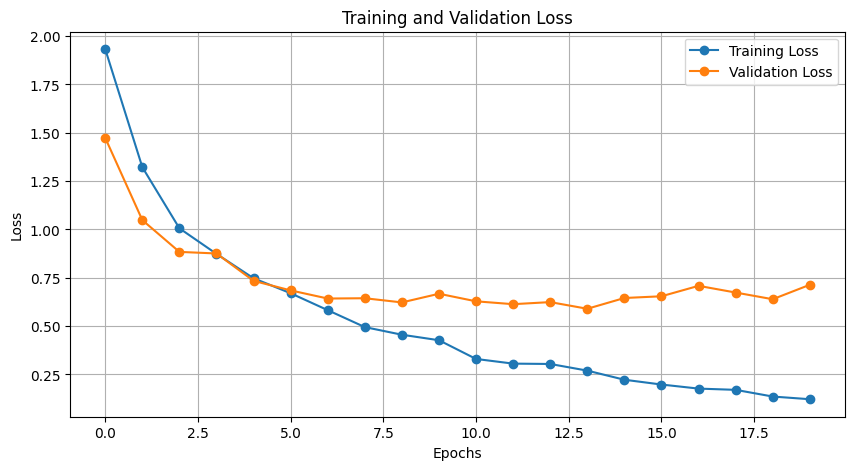

In [54]:
import matplotlib.pyplot as plt

# Assuming you stored the training history as `train_model`
history = train_model

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [55]:
score = model.evaluate(data_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 477ms/step - accuracy: 0.8239 - loss: 0.7073
Test loss: 0.7481116056442261
Test accuracy: 0.8176583647727966


In [57]:
print(len(data_test))

521


In [65]:
print(len(test_label))

521


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step


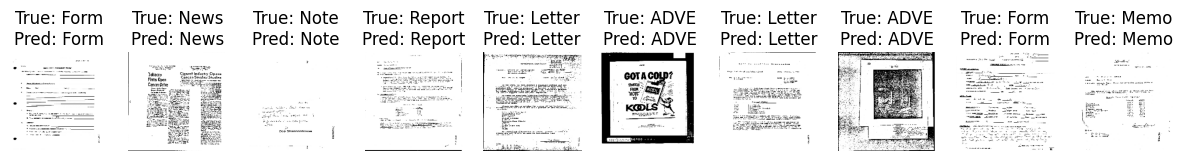

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have:
y_pred_probs = model.predict(data_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Map index back to class name
idx_to_class = {idx: cls for cls, idx in class_to_idx.items()}

def show_predictions(images, y_true, y_pred, idx_to_class, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i])
        plt.axis('off')
        true_label = idx_to_class[y_true[i]]
        pred_label = idx_to_class[y_pred[i]]
        plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.show()

show_predictions(data_test, y_true, y_pred, idx_to_class, num_images=10)
